In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv


In [2]:
df = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
df.shape

(100000, 18)

In [4]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [6]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [7]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [8]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [9]:
odd = df.loc[df['u'] == -9999]
odd

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
79543,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


In [10]:
odd2 = df.loc[df['g'] == -9999]
odd2

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
79543,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


In [11]:
odd3 = df.loc[df['z'] == -9999]
odd3

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
79543,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


In [12]:
df = df.drop(df.index[79543], axis=0)
df.shape

(99999, 18)

In [13]:
df.loc[df['u'] == -9999]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


In [14]:
df = df.reset_index(drop=True)

In [15]:
df['rerun_ID'].unique()

array([301])

In [16]:
df = df.drop(columns = ['rerun_ID'],axis=1)

In [17]:
df_else = df.sample(frac=0.9, random_state=25)
df_test = df.drop(df_else.index)

In [18]:
print(df_else.shape)
print(df_test.shape)

(89999, 17)
(10000, 17)


In [19]:
df_train = df_else.sample(frac=0.8, random_state = 20)
df_val = df_else.drop(df_train.index)

In [20]:
print(df_train.shape)
print(df_val.shape)

(71999, 17)
(18000, 17)


In [21]:
t = {'GALAXY':0,'QSO':1,'STAR':2}

In [22]:
df_train['class_enc'] = df_train['class'].map(t)
df_val['class_enc'] = df_val['class'].map(t)
df_train.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,class_enc
99065,1.237661e+18,226.339335,39.083512,23.00129,20.39655,18.74937,18.07508,17.65329,3699,3,227,1.574036e+18,GALAXY,0.284505,1398,53146,101,0
87964,1.237662e+18,176.030222,42.271812,25.90236,23.52246,21.42230,20.30071,19.50847,3840,4,131,9.422931e+18,GALAXY,0.674011,8369,57451,999,0
99877,1.237663e+18,241.108038,57.755768,18.84881,18.54406,18.69899,18.49950,18.32136,4011,5,52,7.640444e+18,QSO,0.473462,6786,56448,316,1
27689,1.237666e+18,247.071778,51.913554,23.63455,25.06550,22.01961,20.66394,19.96680,4679,3,102,9.072670e+18,GALAXY,0.747011,8058,57196,613,0
90151,1.237665e+18,191.465976,34.474234,19.05091,17.50399,16.60421,16.13665,15.83686,4576,3,484,2.237282e+18,GALAXY,0.063838,1987,53765,433,0


In [23]:
df_train = df_train.drop(['class'],axis=1)
df_val = df_val.drop(['class'], axis=1)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [24]:
df_val.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class_enc
0,1.237668e+18,172.427892,18.790452,24.64223,22.25799,21.90783,21.04677,20.68865,5313,2,87,6.619268e+18,0.000381,5879,56047,372,2
1,1.237663e+18,331.238887,0.201204,22.90914,21.54735,21.17424,20.81643,20.60504,4192,4,164,1.032006e+19,3.176916,9166,58051,205,1
2,1.237658e+18,141.637279,42.088899,25.03010,23.79241,21.48902,20.47543,19.81643,2830,1,215,9.342972e+18,0.595731,8298,57390,927,0
3,1.237668e+18,84.873591,-2.153757,21.72150,21.17631,19.22806,18.42299,17.82802,5181,6,89,8.172984e+18,0.277057,7259,56603,278,0
4,1.237679e+18,321.649375,2.096375,21.25759,20.10503,20.81921,20.29224,19.06567,7712,4,73,1.031569e+19,0.219943,9162,58040,702,0


In [25]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,4481.403354,3.511625,186.127011,5.783903e+18,0.576667,5137.027890,55588.653687,449.315613
std,8.438450e+12,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,1964.739021,1.586913,149.007687,3.324026e+18,0.730709,2952.312485,1808.492217,272.498252
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,3187.000000,2.000000,82.000000,2.844137e+18,0.054522,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,4188.000000,4.000000,146.000000,5.614896e+18,0.424176,4987.000000,55869.000000,433.000000
75%,1.237668e+18,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,5326.000000,5.000000,241.000000,8.332365e+18,0.704172,7400.500000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [26]:
# Feature Selection
# Numerical input and Classification output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df_train.drop(['class_enc'],axis=1)
y = df_train[['class_enc']]

fs = f_classif(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [27]:
fs

(array([9.41410908e+01, 1.45270428e+01, 1.55686677e+02, 3.07533466e+03,
        2.72386152e+03, 3.37861887e+03, 6.03181912e+03, 7.37548891e+03,
        9.40820066e+01, 2.10681837e+01, 5.73119698e+01, 3.79358179e+03,
        5.96907772e+04, 3.79357492e+03, 3.23802454e+03, 3.27475006e+02]),
 array([1.47370782e-041, 4.92332106e-007, 3.40350021e-068, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.56316361e-041, 7.12656940e-010, 1.34747436e-025, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.64489250e-142]))

In [28]:
fs[0][1]

14.527042751808048

In [29]:
fs_df = pd.DataFrame(columns=['f_score','p_value'])

col = []
f_score = []
p_value = []
for i in range(len(df_train.columns)-1):
    col.append(df_train.columns[i])
    f_score.append(fs[0][i])
    p_value.append(fs[1][i])
    
fs_df['col'] = col
fs_df['f_score'] = f_score
fs_df['p_value'] = p_value

In [30]:
fs_df

,f_score,p_value,col
0,94.141091,1.473708e-41,obj_ID
1,14.527043,4.923321e-07,alpha
2,155.686677,3.403500e-68,delta
3,3075.334656,0.000000e+00,u
4,2723.861524,0.000000e+00,g
5,3378.618866,0.000000e+00,r
6,6031.819122,0.000000e+00,i
7,7375.488908,0.000000e+00,z
8,94.082007,1.563164e-41,run_ID
9,21.068184,7.126569e-10,cam_col


In [31]:
fs_df = fs_df.sort_values(by=['f_score'], ascending=False)
fs_df = fs_df.reset_index(drop=True)
fs_df

,f_score,p_value,col
0,59690.777219,0.000000e+00,redshift
1,7375.488908,0.000000e+00,z
2,6031.819122,0.000000e+00,i
3,3793.581787,0.000000e+00,spec_obj_ID
4,3793.574919,0.000000e+00,plate
5,3378.618866,0.000000e+00,r
6,3238.024539,0.000000e+00,MJD
7,3075.334656,0.000000e+00,u
8,2723.861524,0.000000e+00,g
9,327.475006,2.644892e-142,fiber_ID


In [32]:
fs_df.loc[fs_df['p_value'] <= 0.05]

,f_score,p_value,col
0,59690.777219,0.000000e+00,redshift
1,7375.488908,0.000000e+00,z
2,6031.819122,0.000000e+00,i
3,3793.581787,0.000000e+00,spec_obj_ID
4,3793.574919,0.000000e+00,plate
5,3378.618866,0.000000e+00,r
6,3238.024539,0.000000e+00,MJD
7,3075.334656,0.000000e+00,u
8,2723.861524,0.000000e+00,g
9,327.475006,2.644892e-142,fiber_ID


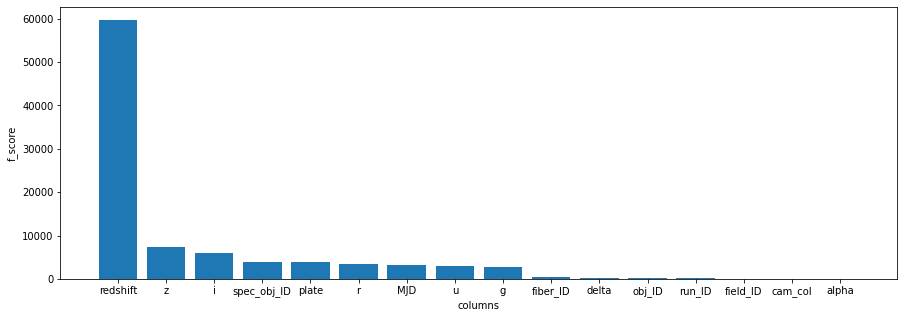

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(fs_df['col'],fs_df['f_score'])
plt.xlabel('columns')
plt.ylabel('f_score')
plt.show()

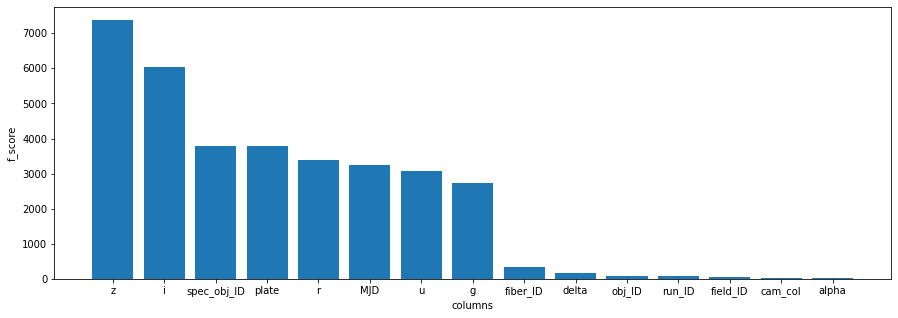

In [34]:
plt.figure(figsize=(15,5))
plt.bar(fs_df.loc[fs_df['f_score'] <10000]['col'], fs_df.loc[fs_df['f_score'] < 10000]['f_score'])
plt.xlabel('columns')
plt.ylabel('f_score')
plt.show()

In [35]:
fs_sel = []
for i in range(len(fs_df.loc[fs_df['f_score'] > 2000])):
    fs_sel.append(fs_df['col'][i])

fs_sel

['redshift', 'z', 'i', 'spec_obj_ID', 'plate', 'r', 'MJD', 'u', 'g']

In [36]:
fs_sel.append('class_enc')

In [37]:
df_test['class_enc'] = df_test['class'].map(t)
df_test = df_test.drop(columns=['class'],axis=1)

In [38]:
df_train = df_train[fs_sel]
df_test = df_test[fs_sel]
df_val = df_val[fs_sel]

In [39]:
df_val.shape

(18000, 10)

In [40]:
df_train['class_enc'].value_counts()

0    42793
2    15507
1    13699
Name: class_enc, dtype: int64

In [41]:
df_com = pd.concat([df_train,df_val])
df_com.shape

(89999, 10)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Softmax, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [43]:
import numpy as np
from keras.utils.np_utils import to_categorical

In [44]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

X = df_com.drop(columns=['class_enc'],axis=1)
y = df_com['class_enc']

ss = StandardScaler()
ss.fit(X)
X = pd.DataFrame(ss.transform(X))

#enc.fit(y)

y_cat = to_categorical(y)
#y_cat = enc.transform(y)



In [45]:
y_cat

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X.values,y_cat, test_size=0.2) 

In [47]:
def base_model(n_hidden=1, n_neurons=30, learning_rate=0.01):
    model = Sequential()
    model.add(InputLayer(input_shape=(9,)))
    for i in range(n_hidden):
        model.add(Dense(n_neurons,activation='relu'))
        model.add(Dropout(0.2))
    model.add(Dense(3,activation='softmax'))
    model.compile(Adam(lr=learning_rate),'categorical_crossentropy', metrics=['accuracy'])
    return model

In [48]:
# model.fit(x_train,y_train,verbose=1,epochs=100)
from keras.callbacks import EarlyStopping

estimator = KerasClassifier(base_model)

#estimator.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),
              #callbacks=[EarlyStopping(patience=10)])
#mse_test = estimator.score(x_test,y_test)

#mse_test




In [49]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_hidden': [0,1],
    'n_neurons': np.arange(1,50),
    'learning_rate': reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(estimator, param_distributions, n_iter=10, cv=3)
rnd_search_cv.fit(x_train,y_train, epochs=100, validation_data=(x_test,y_test),
                 callbacks=[EarlyStopping(patience=5)])

#cv = KFold(n_splits=2, shuffle=True, random_state=25)

#scores = cross_val_score(estimator,x_train,y_train,cv=cv,n_jobs=-1)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5454 - accuracy: 0.8022 - val_loss: 0.3782 - val_accuracy: 0.8776
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3386 - accuracy: 0.8916 - val_loss: 0.3041 - val_accuracy: 0.9120
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2868 - accuracy: 0.9136 - val_loss: 0.2704 - val_accuracy: 0.9164
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2603 - accuracy: 0.9253 - val_loss: 0.2508 - val_accuracy: 0.9331
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2444 - accuracy: 0.9317 - val_loss: 0.2376 - val_accuracy: 0.9333
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2334 - accuracy: 0.9355 - val_loss: 0.2283 - val_accuracy: 0.9407
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2254 - accuracy: 0.9385 - val_loss: 0.2218 - val_ac

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f40323f07d0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4031ffd8d0>,
                                        'n_hidden': [0, 1],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [50]:
rnd_search_cv.best_params_

{'learning_rate': 0.00078693335355484, 'n_hidden': 1, 'n_neurons': 36}

In [51]:
rnd_search_cv.best_score_

0.9679440061251322

In [52]:
model = rnd_search_cv.best_estimator_.model

model = Sequential()
model.add(InputLayer(input_shape=(9,)))

model.add(Dense(46,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(Adam(learning_rate=0.0003035874858509736),'categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),
              callbacks=[EarlyStopping(patience=5)])
#mse_test = model.score(x_test,y_test)

#mse_test

In [53]:
#np.argmax

In [54]:
test_x = df_test.drop(columns=['class_enc'],axis=1)
test_y = df_test[['class_enc']]

test_x = ss.transform(test_x)

pred = model.predict(test_x)
pred


array([[9.9429339e-01, 5.7065804e-03, 6.9286566e-19],
       [9.8263633e-01, 1.7363701e-02, 1.3281083e-33],
       [9.9910396e-01, 8.9595781e-04, 1.0995679e-15],
       ...,
       [8.1816042e-04, 9.9918181e-01, 0.0000000e+00],
       [2.2376487e-01, 7.7623516e-01, 2.8172112e-30],
       [9.9815446e-01, 1.8454969e-03, 3.7759329e-21]], dtype=float32)

In [55]:
sd=[]
for i in range(len(pred)):
    sd.append(np.argmax(pred[i]))


In [56]:
accuracy_score(test_y,sd)

0.9681